# Plot Adjoint Gradients

In [3]:
from os.path import expanduser, join
import sys
import numpy as np
import matplotlib.pyplot as plt

user_home_dir = expanduser('~')
sys.path.insert(0, join(user_home_dir,'emu-utilities'))
from emu_utilities.adjoint_gradient import load_adjoint_gradient
import xarray as xr
sys.path.insert(0,join(user_home_dir,'ECCOv4-py'))
import ecco_v4_py as ecco

In [4]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
from pathlib import Path
from os.path import join
import warnings
warnings.filterwarnings('ignore')
import ecco_v4_py as ecco

## Load Datasets

In [5]:
NOTEBOOK_DIR = Path().resolve()
FIGURES_DIR = Path(NOTEBOOK_DIR / "../../figures").resolve()
DATA_DIR_A = Path("/efs_ecco/ascherer")
DATA_DIR_S = Path("/efs_ecco/sjarugul")
SST_ADJ_T_94_PATH = DATA_DIR_A / "adjoint/emu_adj_30_33_3_mask3d.105.0_115.0_-12.0_-8.0_10.0_0.0_1"
SST_ADJ_T_10_PATH = DATA_DIR_A / "adjoint/emu_adj_222_225_3_mask3d.105.0_115.0_-12.0_-8.0_10.0_0.0_1"
SST_ADJ_S_94_PATH = DATA_DIR_S / "Project_Datasets/emu_adj_30_33_4_mask3d.105.0_115.0_-12.0_-8.0_10.0_0.0_1"
SST_ADJ_S_10_PATH = DATA_DIR_S / "Project_Datasets/emu_adj_222_225_4_mask3d.105.0_115.0_-12.0_-8.0_10.0_0.0_1"
# TS_DAILY_PATH = DATA_DIR_A / "v4r5/surface_sal_temp_fw_daily_latlon_10N-20S_90E-120E.nc"
# TS_MONTHLY_PATH = DATA_DIR_A / "v4r4/surface_sal_temp_fw_monthly_latlon_10N-20S_90E-120E.nc"
# IOD_PATH = DATA_DIR / "iod.nc"

In [6]:
ds_adj_t_94 = load_adjoint_gradient(SST_ADJ_T_94_PATH)
ds_adj_t_10 = load_adjoint_gradient(SST_ADJ_T_10_PATH)
ds_adj_s_94 = load_adjoint_gradient(SST_ADJ_S_94_PATH)
ds_adj_s_10 = load_adjoint_gradient(SST_ADJ_S_10_PATH)

In [7]:
ds_adj_t_94

<xarray.Dataset> Size: 493MB
Dimensions:   (lag: 146, tile: 13, j: 90, i: 90)
Coordinates:
  * lag       (lag) int64 1kB 145 144 143 142 141 140 139 138 ... 6 5 4 3 2 1 0
  * tile      (tile) int64 104B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j         (j) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i         (i) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
    xc        (tile, j, i) float32 421kB -111.6 -111.3 -110.9 ... -105.6 -111.9
    yc        (tile, j, i) float32 421kB -88.24 -88.38 -88.52 ... -88.08 -88.1
Data variables:
    empmr     (lag, tile, j, i) float32 61MB nan nan nan nan ... nan nan nan nan
    pload     (lag, tile, j, i) float32 61MB nan nan nan nan ... nan nan nan nan
    qnet      (lag, tile, j, i) float32 61MB nan nan nan nan ... nan nan nan nan
    qsw       (lag, tile, j, i) float32 61MB nan nan nan nan ... nan nan nan nan
    saltflux  (lag, tile, j, i) float32 61MB nan nan nan nan ... nan nan nan nan
    spflx     (lag, tile, j, i) float32 61MB nan nan nan nan ... nan nan nan nan
    tauu      (lag, tile, j, i) float32 61MB nan nan nan nan ... nan nan nan nan
    tauv      (lag, tile, j, i) float32 61MB nan nan nan nan ... nan nan nan nan
Attributes:
    created:     2025-05-30T00:28:48.672431
    run_name:    emu_adj_30_33_3_mask3d.105.0_115.0_-12.0_-8.0_10.0_0.0_1
    tool:        adj
    variable:    SSH
    short_name:  sea_surface_height

In [50]:
def plot_adjoint_gradient(ds_94: xr.Dataset, ds_10: xr.Dataset, lag: int, fig_name: str) -> None:
    new_grid_delta_lat = 1
    new_grid_delta_lon = 1
    
    new_grid_min_lat = -90
    new_grid_max_lat = 90
    
    new_grid_min_lon = -180
    new_grid_max_lon = 180
    
    lon_c, lat_c, _, _, qnet_latlon = ecco.resample_to_latlon(
        ds_94.xc,
        ds_94.yc,
        ds_94.qnet.sel(lag=lag),
        new_grid_min_lat,
        new_grid_max_lat,
        new_grid_delta_lat,
        new_grid_min_lon,
        new_grid_max_lon,
        new_grid_delta_lon,
        fill_value = np.nan,
        mapping_method = "nearest_neighbor",
    )
    
    lon_c1, lat_c1, _, _, empmr_latlon = ecco.resample_to_latlon(
        ds_94.xc,
        ds_94.yc,
        ds_94.empmr.sel(lag=lag),
        new_grid_min_lat,
        new_grid_max_lat,
        new_grid_delta_lat,
        new_grid_min_lon,
        new_grid_max_lon,
        new_grid_delta_lon,
        fill_value = np.nan,
        mapping_method = "nearest_neighbor",
    )
    
    lon_c2, lat_c2, _, _, tauv_latlon = ecco.resample_to_latlon(
        ds_94.xc,
        ds_94.yc,
        ds_94.tauv.sel(lag=lag),
        new_grid_min_lat,
        new_grid_max_lat,
        new_grid_delta_lat,
        new_grid_min_lon,
        new_grid_max_lon,
        new_grid_delta_lon,
        fill_value = np.nan,
        mapping_method = "nearest_neighbor",
    )
    
    lon_c2, lat_c2, _, _, tauu_latlon = ecco.resample_to_latlon(
        ds_94.xc,
        ds_94.yc,
        ds_94.tauu.sel(lag=lag),
        new_grid_min_lat,
        new_grid_max_lat,
        new_grid_delta_lat,
        new_grid_min_lon,
        new_grid_max_lon,
        new_grid_delta_lon,
        fill_value = np.nan,
        mapping_method = "nearest_neighbor",
    )

    lon_cc, lat_cc, _, _, qnet_latlon2 = ecco.resample_to_latlon(
        ds_10.xc,
        ds_10.yc,
        ds_10.qnet.sel(lag=lag),
        new_grid_min_lat,
        new_grid_max_lat,
        new_grid_delta_lat,
        new_grid_min_lon,
        new_grid_max_lon,
        new_grid_delta_lon,
        fill_value = np.nan,
        mapping_method = "nearest_neighbor",
    )
    
    lon_cc1, lat_cc1, _, _, empmr_latlon2 = ecco.resample_to_latlon(
        ds_10.xc,
        ds_10.yc,
        ds_10.empmr.sel(lag=lag),
        new_grid_min_lat,
        new_grid_max_lat,
        new_grid_delta_lat,
        new_grid_min_lon,
        new_grid_max_lon,
        new_grid_delta_lon,
        fill_value = np.nan,
        mapping_method = "nearest_neighbor",
    )
    
    lon_cc2, lat_cc2, _, _, tauv_latlon2 = ecco.resample_to_latlon(
        ds_10.xc,
        ds_10.yc,
        ds_10.tauv.sel(lag=lag),
        new_grid_min_lat,
        new_grid_max_lat,
        new_grid_delta_lat,
        new_grid_min_lon,
        new_grid_max_lon,
        new_grid_delta_lon,
        fill_value = np.nan,
        mapping_method = "nearest_neighbor",
    )
    
    lon_cc2, lat_cc2, _, _, tauu_latlon2 = ecco.resample_to_latlon(
        ds_10.xc,
        ds_10.yc,
        ds_10.tauu.sel(lag=lag),
        new_grid_min_lat,
        new_grid_max_lat,
        new_grid_delta_lat,
        new_grid_min_lon,
        new_grid_max_lon,
        new_grid_delta_lon,
        fill_value = np.nan,
        mapping_method = "nearest_neighbor",
    )
    
    cm=plt.cm.get_cmap('bwr')
    cm1=cm#.reversed()
    
    fig,ax = plt.subplots(2,4,figsize=(20,8),subplot_kw={'projection':ccrs.PlateCarree()})
    plt.subplots_adjust(hspace=-0.1)
    #fig.tight_layout(pad=3.5)
    
    #ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())
    ax1=ax[0,0]
    p1=ax1.pcolor(lon_c,lat_c,qnet_latlon,cmap=cm1,vmin = -2.5E-5, vmax = 2.5E-5) #ax=ax1,cmap=cm1,vmin = 30, vmax = 35)
    ax1.set_xlabel("Longitude")
    ax1.set_ylabel("Sea Surface Temperature")
    ax1.coastlines('10m',zorder=1)
    ax1.add_feature(cfeature.RIVERS,color='black',zorder=1)
    gl1 = ax1.gridlines(draw_labels=True, x_inline=False, y_inline=False, linewidth=0.0)
    gl1.top_labels=False   # suppress top labels
    gl1.right_labels=False # suppress right labels
    gl1.bottom_labels=True # suppress right labels
    
    lonmapmin = 50
    lonmapmax = 150
    latmapmin = -30
    latmapmax = 30
    ax1.set_extent([lonmapmin, lonmapmax, latmapmin, latmapmax], crs=ccrs.PlateCarree())
    
    ax1.add_patch(mpatches.Rectangle(xy=[105, -12], width=10, height=4,          #Amazon
                                    linewidth=0.5,facecolor='none', edgecolor='gray',
                                    transform=ccrs.PlateCarree()))
    ax1.set_xlabel('Longitude')
    ax1.set_ylabel('Sea Surface Temperature')
    #plt.colorbar(p1,ax=ax1,extend='both').set_label('$\mathregular{kg/m^{2}/s}$')
    ax1.text(-0.15, 0.5, 'Sea Surface Temperature', va='center', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax1.transAxes)
    plt.colorbar(p1,ax=ax1,extend='both',pad=0.02,location='bottom').set_label('$\\mathsf{\\degree C / (W \\; m^{-2})}$')
    
    ax1=ax[0,1]
    p1=ax1.pcolor(lon_c,lat_c,empmr_latlon,cmap=cm1,vmin = -3, vmax = 3) #ax=ax1,cmap=cm1,vmin = 30, vmax = 35)
    ax1.set_xlabel("Longitude")
    ax1.set_ylabel("Latitude")
    ax1.coastlines('10m',zorder=1)
    ax1.add_feature(cfeature.RIVERS,color='black',zorder=1)
    gl1 = ax1.gridlines(draw_labels=True, x_inline=False, y_inline=False, linewidth=0.0)
    gl1.top_labels=False   # suppress top labels
    gl1.right_labels=False # suppress right labels
    gl1.bottom_labels=True # suppress right labels
    
    lonmapmin = 50
    lonmapmax = 150
    latmapmin = -30
    latmapmax = 30
    ax1.set_extent([lonmapmin, lonmapmax, latmapmin, latmapmax], crs=ccrs.PlateCarree())
    
    ax1.add_patch(mpatches.Rectangle(xy=[105, -12], width=10, height=4,          #Amazon
                                    linewidth=0.5,facecolor='none', edgecolor='gray',
                                    transform=ccrs.PlateCarree()))
    ax1.set_xlabel('Longitude')
    ax1.set_ylabel('Latitude')
    #plt.colorbar(p1,ax=ax1,extend='both').set_label('$\mathregular{kg/m^{2}/s}$')
    plt.colorbar(p1,ax=ax1,extend='both',pad=0.02,location='bottom').set_label('$\\mathsf{\\degree C / (kg \\; m^{-2}s^{-1})}$')
    
    ax1=ax[0,2]
    p1=ax1.pcolor(lon_c,lat_c,tauu_latlon,cmap=cm1,vmin = -0.015, vmax = 0.015) #ax=ax1,cmap=cm1,vmin = 30, vmax = 35)
    ax1.set_xlabel("Longitude")
    ax1.set_ylabel("Latitude")
    ax1.coastlines('10m',zorder=1)
    ax1.add_feature(cfeature.RIVERS,color='black',zorder=1)
    gl1 = ax1.gridlines(draw_labels=True, x_inline=False, y_inline=False, linewidth=0.0)
    gl1.top_labels=False   # suppress top labels
    gl1.right_labels=False # suppress right labels
    gl1.bottom_labels=True # suppress right labels
    
    lonmapmin = 50
    lonmapmax = 150
    latmapmin = -30
    latmapmax = 30
    ax1.set_extent([lonmapmin, lonmapmax, latmapmin, latmapmax], crs=ccrs.PlateCarree())
    
    ax1.add_patch(mpatches.Rectangle(xy=[105, -12], width=10, height=4,          #Amazon
                                    linewidth=0.5,facecolor='none', edgecolor='gray',
                                    transform=ccrs.PlateCarree()))
    ax1.set_xlabel('Longitude')
    ax1.set_ylabel('Latitude')
    #plt.colorbar(p1,ax=ax1,extend='both').set_label('$\mathregular{kg/m^{2}/s}$')
    plt.colorbar(p1,ax=ax1,extend='both',pad=0.02,location='bottom').set_label('$\\mathsf{\\degree C / (N \\; m^{-2})}$')
    
    ax1=ax[0,3]
    p1=ax1.pcolor(lon_c,lat_c,tauv_latlon,cmap=cm1,vmin = -0.015, vmax = 0.015) #ax=ax1,cmap=cm1,vmin = 30, vmax = 35)
    ax1.set_xlabel("Longitude")
    ax1.set_ylabel("Latitude")
    ax1.coastlines('10m',zorder=1)
    ax1.add_feature(cfeature.RIVERS,color='black',zorder=1)
    gl1 = ax1.gridlines(draw_labels=True, x_inline=False, y_inline=False, linewidth=0.0)
    gl1.top_labels=False   # suppress top labels
    gl1.right_labels=False # suppress right labels
    gl1.bottom_labels=True # suppress right labels
    
    lonmapmin = 50
    lonmapmax = 150
    latmapmin = -30
    latmapmax = 30
    ax1.set_extent([lonmapmin, lonmapmax, latmapmin, latmapmax], crs=ccrs.PlateCarree())
    
    ax1.add_patch(mpatches.Rectangle(xy=[105, -12], width=10, height=4,          #Amazon
                                    linewidth=0.5,facecolor='none', edgecolor='gray',
                                    transform=ccrs.PlateCarree()))
    ax1.set_xlabel('Longitude')
    ax1.set_ylabel('Latitude')
    #plt.colorbar(p1,ax=ax1,extend='both').set_label('$\mathregular{kg/m^{2}/s}$')
    plt.colorbar(p1,ax=ax1,extend='both',pad=0.02,location='bottom').set_label('$\\mathsf{\\degree C / (N \\; m^{-2})}$')
    
    #---------------------------------------------------------------------------------
    
    
    ax1=ax[1,0]
    p1=ax1.pcolor(lon_cc,lat_cc,qnet_latlon2,cmap=cm1,vmin = -2.5E-5, vmax = 2.5E-5) #ax=ax1,cmap=cm1,vmin = 30, vmax = 35)
    ax1.set_xlabel("Longitude")
    ax1.set_ylabel("Sea Surface Salinity\nLatitude")
    ax1.coastlines('10m',zorder=1)
    ax1.add_feature(cfeature.RIVERS,color='black',zorder=1)
    gl1 = ax1.gridlines(draw_labels=True, x_inline=False, y_inline=False, linewidth=0.0)
    gl1.top_labels=False   # suppress top labels
    gl1.right_labels=False # suppress right labels
    gl1.bottom_labels=True # suppress right labels
    ax1.text(-0.15, 0.5, 'Sea Surface Salinity', va='center', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax1.transAxes)
    # ax.text(0.5, -0.2, 'longitude', va='bottom', ha='center',
    #     rotation='horizontal', rotation_mode='anchor',
    #     transform=ax.transAxes)
        
    lonmapmin = 50
    lonmapmax = 150
    latmapmin = -30
    latmapmax = 30
    ax1.set_extent([lonmapmin, lonmapmax, latmapmin, latmapmax], crs=ccrs.PlateCarree())
    
    ax1.add_patch(mpatches.Rectangle(xy=[105, -12], width=10, height=4,          #Amazon
                                    linewidth=0.5,facecolor='none', edgecolor='gray',
                                    transform=ccrs.PlateCarree()))
    ax1.set_xlabel('Longitude')
    ax1.set_ylabel('Latitude')
    #plt.colorbar(p1,ax=ax1,extend='both').set_label('$\mathregular{kg/m^{2}/s}$')
    plt.colorbar(p1,ax=ax1,extend='both',pad=0.02,location='bottom').set_label('$\\mathsf{PSU / (W \\; m^{-2})}$')
    
    ax1=ax[1,1]
    p1=ax1.pcolor(lon_cc,lat_cc,empmr_latlon2,cmap=cm1,vmin = -3, vmax = 3) #ax=ax1,cmap=cm1,vmin = 30, vmax = 35)
    ax1.set_xlabel("Longitude")
    ax1.set_ylabel("Latitude")
    ax1.coastlines('10m',zorder=1)
    ax1.add_feature(cfeature.RIVERS,color='black',zorder=1)
    gl1 = ax1.gridlines(draw_labels=True, x_inline=False, y_inline=False, linewidth=0.0)
    gl1.top_labels=False   # suppress top labels
    gl1.right_labels=False # suppress right labels
    gl1.bottom_labels=True # suppress right labels
    
    lonmapmin = 50
    lonmapmax = 150
    latmapmin = -30
    latmapmax = 30
    ax1.set_extent([lonmapmin, lonmapmax, latmapmin, latmapmax], crs=ccrs.PlateCarree())
    
    ax1.add_patch(mpatches.Rectangle(xy=[105, -12], width=10, height=4,          #Amazon
                                    linewidth=0.5,facecolor='none', edgecolor='gray',
                                    transform=ccrs.PlateCarree()))
    ax1.set_xlabel('Longitude')
    ax1.set_ylabel('Latitude')
    #plt.colorbar(p1,ax=ax1,extend='both').set_label('$\mathregular{kg/m^{2}/s}$')
    plt.colorbar(p1,ax=ax1,extend='both',pad=0.02,location='bottom').set_label('$\\mathsf{PSU / (kg \\; m^{-2}s^{-1})}$')
    
    ax1=ax[1,2]
    p1=ax1.pcolor(lon_cc,lat_cc,tauu_latlon2,cmap=cm1,vmin = -0.015, vmax = 0.015) #ax=ax1,cmap=cm1,vmin = 30, vmax = 35)
    ax1.set_xlabel("Longitude")
    ax1.set_ylabel("Latitude")
    ax1.coastlines('10m',zorder=1)
    ax1.add_feature(cfeature.RIVERS,color='black',zorder=1)
    gl1 = ax1.gridlines(draw_labels=True, x_inline=False, y_inline=False, linewidth=0.0)
    gl1.top_labels=False   # suppress top labels
    gl1.right_labels=False # suppress right labels
    gl1.bottom_labels=True # suppress right labels
    
    lonmapmin = 50
    lonmapmax = 150
    latmapmin = -30
    latmapmax = 30
    ax1.set_extent([lonmapmin, lonmapmax, latmapmin, latmapmax], crs=ccrs.PlateCarree())
    
    ax1.add_patch(mpatches.Rectangle(xy=[105, -12], width=10, height=4,          #Amazon
                                    linewidth=0.5,facecolor='none', edgecolor='gray',
                                    transform=ccrs.PlateCarree()))
    ax1.set_xlabel('Longitude')
    ax1.set_ylabel('Latitude')
    #plt.colorbar(p1,ax=ax1,extend='both').set_label('$\mathregular{kg/m^{2}/s}$')
    plt.colorbar(p1,ax=ax1,extend='both',pad=0.02,location='bottom').set_label('$\\mathsf{PSU / (N \\; m^{-2})}$')
    
    
    ax1=ax[1,3]
    p1=ax1.pcolor(lon_cc,lat_cc,tauv_latlon2,cmap=cm1,vmin = -0.015, vmax = 0.015) #ax=ax1,cmap=cm1,vmin = 30, vmax = 35)
    ax1.set_xlabel("Longitude")
    ax1.set_ylabel("Latitude")
    ax1.coastlines('10m',zorder=1)
    ax1.add_feature(cfeature.RIVERS,color='black',zorder=1)
    gl1 = ax1.gridlines(draw_labels=True, x_inline=False, y_inline=False, linewidth=0.0)
    gl1.top_labels=False   # suppress top labels
    gl1.right_labels=False # suppress right labels
    gl1.bottom_labels=True # suppress right labels
    
    lonmapmin = 50
    lonmapmax = 150
    latmapmin = -30
    latmapmax = 30
    ax1.set_extent([lonmapmin, lonmapmax, latmapmin, latmapmax], crs=ccrs.PlateCarree())
    
    ax1.add_patch(mpatches.Rectangle(xy=[105, -12], width=10, height=4,          #Amazon
                                    linewidth=0.5,facecolor='none', edgecolor='gray',
                                    transform=ccrs.PlateCarree()))
    ax1.set_xlabel('Longitude')
    ax1.set_ylabel('Latitude')
    #plt.colorbar(p1,ax=ax1,extend='both').set_label('$\mathregular{kg/m^{2}/s}$')
    plt.colorbar(p1,ax=ax1,extend='both',pad=0.02,location='bottom').set_label('$\\mathsf{PSU / (N \\; m^{-2})}$')

    ax[0, 0].set_title("Heat Flux")
    ax[0, 1].set_title("Freshwater Flux")
    ax[0, 2].set_title("Westward Wind Stress")
    ax[0, 3].set_title("Southward Wind Stress")
    
    plt.savefig(FIGURES_DIR / fig_name, bbox_inches='tight',dpi=300)


## SST Gradient Plots

### 24 Week Lag

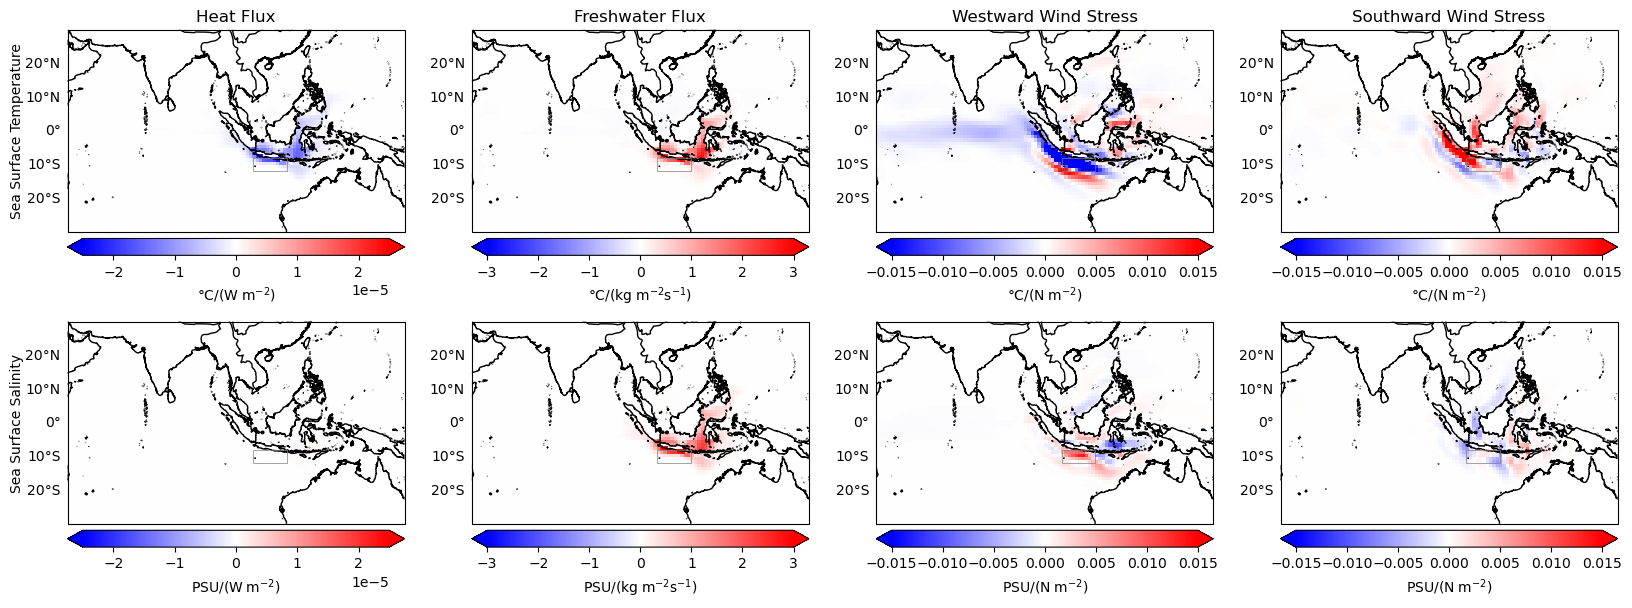

In [51]:
plot_adjoint_gradient(ds_adj_t_10, ds_adj_s_10, 24, "poster_pres_figs/EMU_SST_SSS_Adjoint_Lag24weeks_2010.png")

## SSS Gradient Plots

### 24 Week Lag

In [ ]:
plot_adjoint_gradient(ds_adj_s_94, ds_adj_s_10, 24, "poster_pres_figs/EMU_SSS_Adjoint_Lag24weeks_1994_2010.png")